In [1]:
%matplotlib widget
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import part_I_plots as plots
from ipas.collection_from_db.batch_statistics import Batch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pickle

In [3]:
xlarge=18; large = 16; med = 16; small = 14
params = {'axes.titlesize': med,
          'legend.fontsize': 14,
          'axes.labelsize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': med,
          "font.family": "serif"}
  
mpl.rc('font',family='serif')
plt.rcParams.update(params)

In [ ]:
# note these files are not made available on git

In [4]:
# get characteristic and +/- 1 std dev from mean..
# simulations vary Na from 100-1000
# proves there is minimal difference as a function of Na

phioarr = np.logspace(-2, 2, num=20, dtype=None) #monomer aspect ratio array
Na = [100,300,500,1000] # number of aggs per simulation/distribution

chs_flat=np.empty((len(phioarr),len(Na)))
pos_error_flat=np.empty((len(phioarr),len(Na)))
neg_error_flat=np.empty((len(phioarr),len(Na)))
agg_phi_flat=np.empty((len(phioarr),0,len(Na)))

chs_rand=np.empty((len(phioarr),len(Na)))
pos_error_rand=np.empty((len(phioarr),len(Na)))
neg_error_rand=np.empty((len(phioarr),len(Na)))

for c,n in enumerate(Na):
    f = open('../instance_files/instance_iceice_flat_r10_phi20_n'+str(n), 'rb')
    results = pickle.load(f)
    agg_as = results['agg_as'] #major axis of agg
    agg_cs = results['agg_cs'] #minor axis of agg
    agg_phi_flat=agg_cs/agg_as #calculate new aspect ratio, a>c always
    f = open('../instance_files/instance_iceice_rand_r10_phi20_n'+str(n), 'rb')
    results = pickle.load(f)
    agg_as = results['agg_as'] #major axis of agg
    agg_cs = results['agg_cs'] #minor axis of agg
    agg_phi_rand=agg_cs/agg_as #calculate new aspect ratio, a>c always
  
    for i in range(len(phioarr)):
        #calculate characteristic value of dist of Na aggs from gamma
        batch = Batch(agg_phi_flat[i,0,:])
        batch.fit_distribution()
        chs_flat[i,c]=batch.gamma_ch
        pos_error_flat[i,c]=batch.pos_error
        neg_error_flat[i,c]=batch.neg_error

        batch = Batch(agg_phi_rand[i,0,:])
        batch.fit_distribution()
        chs_rand[i,c]=batch.gamma_ch
        pos_error_rand[i,c]=batch.pos_error
        neg_error_rand[i,c]=batch.neg_error
        

In [5]:
# get characteristic aspect ratio, a, and c axis
# also finds +/- 1 std dev from mean of each variable (shading on plots)
# distibution of 300 aggs for 4 simulations 
# calls Batch in /scripts/batch_statistics.py

Na = 300 # number of aggs per distribution
# 4 different simulations with identical initializations
N = [1,2,3,4] 

# flat orientation
# major axis
agg_flat_runs_as = np.empty((len(N), len(phioarr), Na))
chs_flat_runs_as = np.empty((len(N), len(phioarr))) 
neg_error_flat_runs_as = np.empty((len(N), len(phioarr)))
pos_error_flat_runs_as = np.empty((len(N), len(phioarr)))
# minor axis
agg_flat_runs_cs = np.empty((len(N), len(phioarr), Na))
chs_flat_runs_cs = np.empty((len(N), len(phioarr))) 
neg_error_flat_runs_cs = np.empty((len(N), len(phioarr)))
pos_error_flat_runs_cs = np.empty((len(N), len(phioarr)))
# aspect ratio
agg_flat_runs_phis = np.empty((len(N), len(phioarr)))
chs_flat_runs_phis = np.empty((len(N), len(phioarr)))
pos_error_flat_runs_phis = np.empty((len(N), len(phioarr)))
neg_error_flat_runs_phis = np.empty((len(N), len(phioarr)))

# random orientation
# major axis
agg_rand_runs_as = np.empty((len(N), len(phioarr), Na))
chs_rand_runs_as = np.empty((len(N), len(phioarr))) 
pos_error_rand_runs_as = np.empty((len(N), len(phioarr)))
neg_error_rand_runs_as = np.empty((len(N), len(phioarr)))
# minor axis
agg_rand_runs_cs = np.empty((len(N), len(phioarr), Na))
chs_rand_runs_cs = np.empty((len(N), len(phioarr)))
pos_error_rand_runs_cs = np.empty((len(N), len(phioarr)))
neg_error_rand_runs_cs = np.empty((len(N), len(phioarr)))
# aspect ratio
agg_rand_runs_phis = np.empty((len(N), len(phioarr)))
chs_rand_runs_phis = np.empty((len(N), len(phioarr))) 
pos_error_rand_runs_phis = np.empty((len(N), len(phioarr)))
neg_error_rand_runs_phis = np.empty((len(N), len(phioarr)))


for c,n in enumerate(N):  # loop over 4 simulations
    
    f = open('../instance_files/instance_iceice_flat_r10_phi20_run'+str(n), 'rb')
    results = pickle.load(f)
    agg_flat_runs_as[c,:,:] = results['agg_as'][:,0,:] # major axis of agg
    agg_flat_runs_cs[c,:,:] = results['agg_cs'][:,0,:] # minor axis of agg
    agg_flat_runs_phis = agg_flat_runs_cs[c,:,:]/agg_flat_runs_as[c,:,:] # aspect ratio, a>c always (0-1)
    
    f = open('../instance_files/instance_iceice_rand_r10_phi20_run'+str(n), 'rb')
    results = pickle.load(f)
    agg_rand_runs_as[c,:,:] = results['agg_as'][:,0,:] # major axis of agg
    agg_rand_runs_cs[c,:,:] = results['agg_cs'][:,0,:] # minor axis of agg
    #shape = (20, 300) for 1 simulation
    agg_rand_runs_phis = agg_rand_runs_cs[c,:,:]/agg_rand_runs_as[c,:,:] # aspect ratio
    
    for i in range(len(phioarr)): #loop over monomer aspect ratios
        # calculate characteristic value of dist of Na aggs from gamma distribution
        # pass in variable into Batch
        # aspect ratio flat
        batch = Batch(agg_flat_runs_phis[i,:]) # shape = 300
        batch.fit_distribution()
        chs_flat_runs_phis[c,i] = batch.gamma_ch
        # pos and neg error are +/- 1 std dev from mean of distribution
        pos_error_flat_runs_phis[c,i] = batch.pos_error
        neg_error_flat_runs_phis[c,i] = batch.neg_error
        
        # agg a axis flat
        batch = Batch(agg_flat_runs_as[c,i,:]) 
        batch.fit_distribution(plot=False)
        chs_flat_runs_as[c,i] = batch.gamma_ch
        pos_error_flat_runs_as[c,i] = batch.pos_error
        neg_error_flat_runs_as[c,i] = batch.neg_error
        
        # agg c axis flat
        batch = Batch(agg_flat_runs_cs[c,i,:]) 
        batch.fit_distribution(plot=False)
        chs_flat_runs_cs[c,i] = batch.gamma_ch
        pos_error_flat_runs_cs[c,i] = batch.pos_error
        neg_error_flat_runs_cs[c,i] = batch.neg_error
        
        # aspect ratio rand
        batch = Batch(agg_rand_runs_phis[i,:])
        batch.fit_distribution()
        chs_rand_runs_phis[c,i] = batch.gamma_ch
        pos_error_rand_runs_phis[c,i] = batch.pos_error
        neg_error_rand_runs_phis[c,i] = batch.neg_error
        
        # agg a axis rand
        batch = Batch(agg_rand_runs_as[c,i,:])
        batch.fit_distribution()
        chs_rand_runs_as[c,i] = batch.gamma_ch
        pos_error_rand_runs_as[c,i] = batch.pos_error
        neg_error_rand_runs_as[c,i] = batch.neg_error
        
        # agg c axis rand
        batch = Batch(agg_rand_runs_cs[c,i,:])
        batch.fit_distribution()
        chs_rand_runs_cs[c,i] = batch.gamma_ch
        pos_error_rand_runs_cs[c,i] = batch.pos_error
        neg_error_rand_runs_cs[c,i] = batch.neg_error


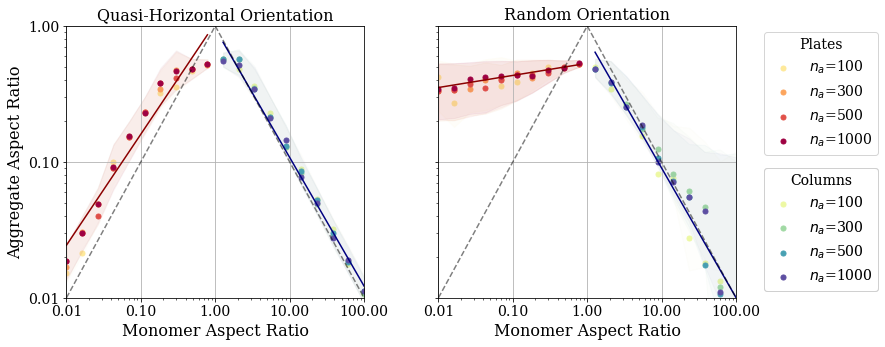

In [6]:
plots.aspect_ratios_Na(neg_error_flat, pos_error_flat, chs_flat,
                     neg_error_rand, pos_error_rand, chs_rand, save_fig=True)

#### Standard deviation between runs for both orientations and plates and columns

In [7]:
rand_plate=np.mean(np.std(chs_rand_runs_phis[:,:10], axis=0))
rand_column=np.mean(np.std(chs_rand_runs_phis[:,10:], axis=0))
qh_plate=np.mean(np.std(chs_flat_runs_phis[:,:10], axis=0))
qh_column=np.mean(np.std(chs_flat_runs_phis[:,10:], axis=0))

print('rand plate std | rand column std | QH plate std | QH column std')
print(rand_plate, rand_column, qh_plate, qh_column)

rand plate std | rand column std | QH plate std | QH column std
0.015004794875682795 0.006222329990326268 0.006593482775573753 0.008213970755900088


### Below for change in axes lengths plot

In [8]:
phio = np.logspace(-2, 2, num=20, dtype=None)
phio_p = phio[:10]
phio_c = phio[10:]
r = 10
mono_as = []
mono_cs = []
for phi in phio:
    mono_a = (r ** 3 / phi) ** (1. / 3.) # monomer major axis
    mono_as.append(mono_a)
    mono_cs.append(phi * mono_a) # monomer minor axis
mono_as_p = mono_as[:10]
mono_as_c = mono_as[10:]
mono_cs_p = mono_cs[:10]
mono_cs_c = mono_cs[10:]

In [9]:
# average characteristic valus and shading envelopes across 4 runs
# FLAT orientation
# aspect ratio
avg_phi_flat = np.mean(chs_flat_runs_phis, axis=0) 
neg_error_flat_phis = np.mean(neg_error_flat_runs_phis, axis=0)
pos_error_flat_phis = np.mean(pos_error_flat_runs_phis, axis=0)
# major axis
avg_as_flat = np.mean(chs_flat_runs_as, axis=0) 
neg_error_flat_as = np.mean(neg_error_flat_runs_as, axis=0)
pos_error_flat_as = np.mean(pos_error_flat_runs_as, axis=0)
# minor axis
avg_cs_flat = np.mean(chs_flat_runs_cs, axis=0) 
neg_error_flat_cs = np.mean(neg_error_flat_runs_cs, axis=0)
pos_error_flat_cs = np.mean(pos_error_flat_runs_cs, axis=0)

# RAND orientation
# aspect ratio
avg_phi_rand = np.mean(chs_rand_runs_phis, axis=0) 
neg_error_rand_phis = np.mean(neg_error_rand_runs_phis, axis=0)
pos_error_rand_phis = np.mean(pos_error_rand_runs_phis, axis=0)
# major axis
avg_as_rand = np.mean(chs_rand_runs_as, axis=0) 
neg_error_rand_as = np.mean(neg_error_rand_runs_as, axis=0)
pos_error_rand_as = np.mean(pos_error_rand_runs_as, axis=0)
# minor axis
avg_cs_rand = np.mean(chs_rand_runs_cs, axis=0) 
neg_error_rand_cs = np.mean(neg_error_rand_runs_cs, axis=0)
pos_error_rand_cs= np.mean(pos_error_rand_runs_cs, axis=0)

In [10]:
#calculate relative change in axis lengths from monomer to aggregate
delta_flat_plates_major=(avg_as_flat[:10]-mono_as_p)/mono_as_p
delta_flat_columns_major=(avg_as_flat[10:]-mono_cs_c)/mono_cs_c
delta_rand_plates_minor=(avg_cs_rand[:10]-mono_cs_p)/mono_cs_p
delta_rand_columns_minor=(avg_cs_rand[10:]-mono_as_c)/mono_as_c
delta_flat_plates_minor=(avg_cs_flat[:10]-mono_cs_p)/mono_cs_p
delta_flat_columns_minor=(avg_cs_flat[10:]-mono_as_c)/mono_as_c
delta_rand_plates_major=(avg_as_rand[:10]-mono_as_p)/mono_as_p
delta_rand_columns_major=(avg_as_rand[10:]-mono_cs_c)/mono_cs_c

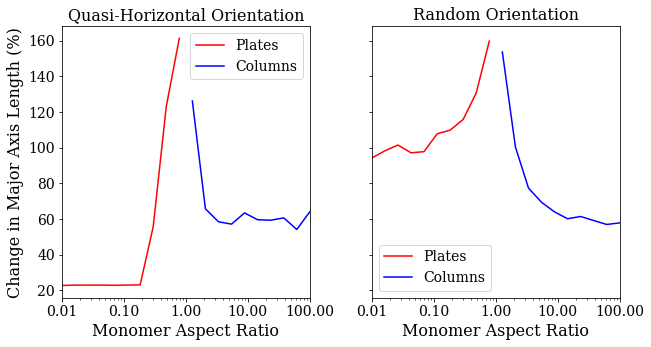

In [11]:
#averaged over 5 simulations with Na=300
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.subplots_adjust(wspace=0.25, hspace=0.1)

ax1.plot(phio_p, delta_flat_plates_major*100, 'r', label='Plates')
ax1.plot(phio_c, delta_flat_columns_major*100, 'b', label='Columns')
ax1.legend()
ax1.set_ylabel('Change in Major Axis Length (%)')
ax1.set_title('Quasi-Horizontal Orientation')
ax1.set_xlim([0.01,100.0])
#ax1.set_ylim([0.00,170])
ax1.set_xlabel('Monomer Aspect Ratio')
ax1.set_xscale('log')

ax2.plot(phio_p, delta_rand_plates_major*100, 'r', label='Plates')
ax2.plot(phio_c, delta_rand_columns_major*100, 'b', label='Columns')
ax2.legend()
ax2.set_title('Random Orientation')
ax2.set_xlim([0.01,100.0])
#ax2.set_ylim([0.00,170])
ax2.set_xlabel('Monomer Aspect Ratio')
ax2.set_xscale('log')

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


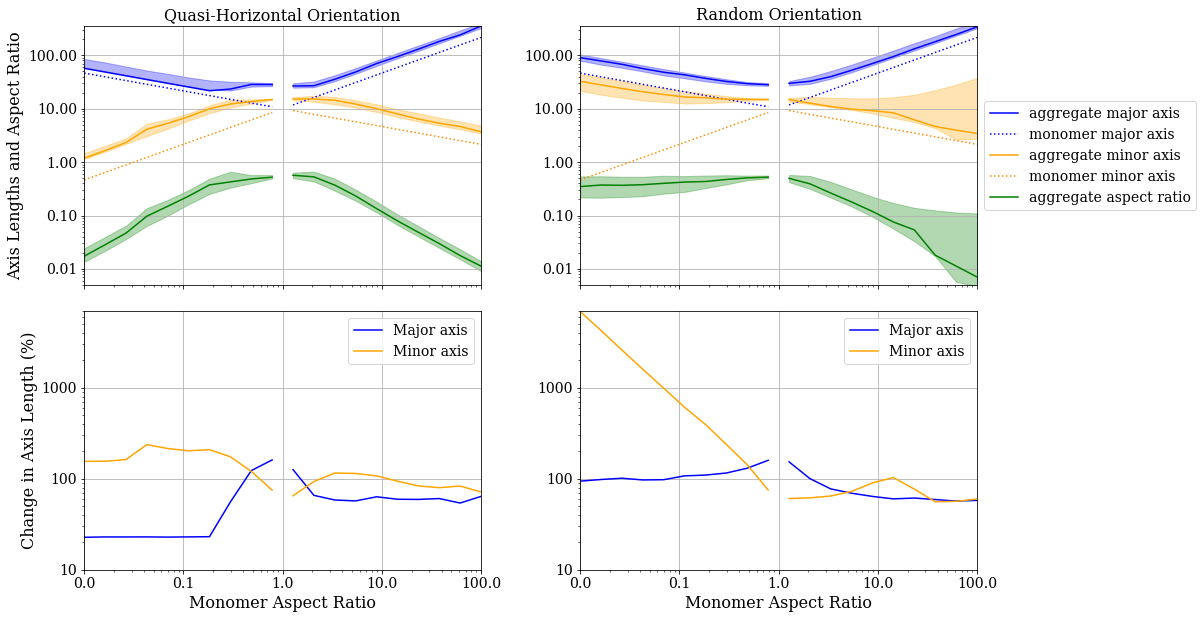

In [12]:
plots.axislengths_aspectratios(phio_p, phio_c, mono_as_p, mono_cs_p, mono_as_c, mono_cs_c,
                             avg_phi_flat, neg_error_flat_phis, pos_error_flat_phis,
                             avg_as_flat, neg_error_flat_as, pos_error_flat_as,
                             avg_cs_flat, neg_error_flat_cs, pos_error_flat_cs,
                             avg_phi_rand, neg_error_rand_phis, pos_error_rand_phis,
                             avg_as_rand, neg_error_rand_as, pos_error_rand_as,
                             avg_cs_rand, neg_error_rand_cs, pos_error_rand_cs,
                             delta_flat_plates_major, delta_flat_plates_minor,
                             delta_flat_columns_major, delta_flat_columns_minor,
                             delta_rand_plates_major, delta_rand_plates_minor,
                             delta_rand_columns_major, delta_rand_columns_minor, save_fig=True)